# Lecture 19 - Implementation of MLPs

Before starting with today's class, let's finish the last sections of lecture 18 "best practices for learning".

## Network Pruning Techniques

* **Network Growing**: Start with a small MLP and add to it when unable to meet design specifications

* **Network Pruning**: Start with a large MLP and prune it by eliminating weights (driving them to zero)

* **Complexity Regularization**: Need an appropriate trade-off between reliability of training data and goodness of the model/NN architecture

* We can find trade-off my minimizing the total risk: 

$$R(w) = J_e(w)+ \lambda J_c(w)$$ 

where $J_e$ is the performance/error measure, $J_c$ is the complexity penalty, and $\lambda$ is a regularization parameter that represents the relative importance of the complexity penalty with respect to the performance measure term.
* $\lambda = 0$: Training based only on training samples
* $\lambda \rightarrow \infty$: Training samples are unreliable, minimize complexity

1. **Weight Decay:** $J_c(w) = \Vert w\Vert_2^2 = \sum_i w_i^2$

2. **Weight Sparsity:** $J_c(w) = |w| = \sum_i |w_i|$

3. **Weight Elimination:**
$$ J_c(w) = \sum_i \frac{\left(\frac{w_i}{w_0}\right)^2}{1+\left(\frac{w_i}{w_0}\right)^2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

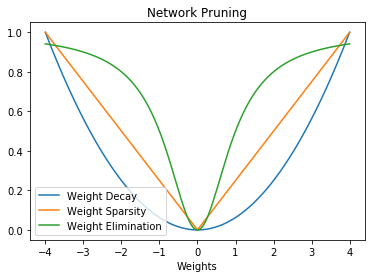

In [2]:
N = 1000
w = np.linspace(-4,4,N)
w0 = 1
Jc1 = w**2/np.max(w**2)
Jc2 = np.abs(w)/np.max(np.abs(w))
Jc3 = (w/w0)**2/ (1 + (w/w0)**2)

plt.plot(w, Jc1, label = 'Weight Decay'); 
plt.plot(w, Jc2, label = 'Weight Sparsity');
plt.plot(w, Jc3, label = 'Weight Elimination'); 
plt.legend(loc='lower left')
plt.title("Network Pruning"); 
plt.xlabel("Weights"); 

# Online (Stochastic) vs Batch Learning

The number of samples used to perform a single training iteration (forward pass + backward pass) will impact the results.

* **Online Learning** (or stochastic/sequential learning): uses one sample to update the parameters of the network.
* **Batch Learning:** uses the entire training set to update the parameters of the network.

## Online Learning 

* Online learning performs local updates based on a single data sample

* One **iteration** consists of a forward pass and a backward pass

* One **epoch** consists of a pass through all training samples

* Suppose we have $N$ training samples, then one epoch has $N$ parameter updates.

* It is good practice to randomly reorder the data points between each epoch. *Why?*

* Online mode of training requires less local storage for each synaptic connection

* Online mode of training makes the search in the weight space *stochastic* in nature

## Batch Learning

* Batch learning performs *global* updates based on the entire training set

* One epoch in Batch learning, only has 1 iteration

* The errors in backward pass are the averaged error over all training samples

* Batch mode can ensure convergence to at least a local minimum

* Batch mode is easier to parallelize

* If a data set is has correlated features, online learning is more able to take advantage of this - unlike batch learning

## Mini-Batch Learning

We can consider mini-batch sets and perform updates based on each mini-batch.

* Similarly to online learning, it is common practice to create new random samples for each mini-batch set for each epoch. *Why?*

* Mini-batches need to be balanced for class representation

* Common sizes are 32, 64 and 128

# Decision Maps in MLPs

[A Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&regularization=L2&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=10&networkShape=2&seed=0.66302&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) is a great tool to provide visual interpretation of MLPs performance. You can choose and interpret the effect of the use of different features, architecture size, learning rate, among others.

## Example: IRIS Dataset

Iris data set from the UCI Repository: https://archive.ics.uci.edu/ml/datasets/Iris

* Samples: 150

* Features: 4 (sepal length in cm, sepal width in cm, petal length in cm, petal width in cm)

* Classes: 3 (setosa, versicolor and virginica)

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(X.shape, y.shape, iris.target_names)

(150, 4) (150,) ['setosa' 'versicolor' 'virginica']


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.neural_network import MLPClassifier

?MLPClassifier

In [7]:
net = MLPClassifier(activation='tanh', solver='adam', batch_size=20,
                   learning_rate_init=0.2, hidden_layer_sizes=(2),
                   early_stopping=True)

net.fit(Xtrain, ytrain)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=20, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.2, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
print("weights between input and hidden layer:")
print(net.coefs_[0])
print("\nweights between hidden and output layer:")
print(net.coefs_[1]) 

weights between input and hidden layer:
[[-0.36505955 -0.2702539 ]
 [-0.24340994 -1.77348346]
 [-0.53227558  0.61260637]
 [-1.04355866  0.78515988]]

weights between hidden and output layer:
[[ 0.44351944  0.29265487 -1.20607185]
 [-0.30414579  1.64727483  1.21952399]]


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_predtrain = net.predict(Xtrain)
y_predtest = net.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_predtrain)
accuracy_test = accuracy_score(ytest, y_predtest)

In [10]:
print("Accuracy in the Train set= ", accuracy_train*100, '%')
print("Accuracy in the Test set= ", accuracy_test*100, '%')

print("Confusion matrix:")
confusion_matrix(ytest, y_predtest)

Accuracy in the Train set=  88.33333333333333 %
Accuracy in the Test set=  93.33333333333333 %
Confusion matrix:


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 1,  0, 10]], dtype=int64)

In [11]:
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

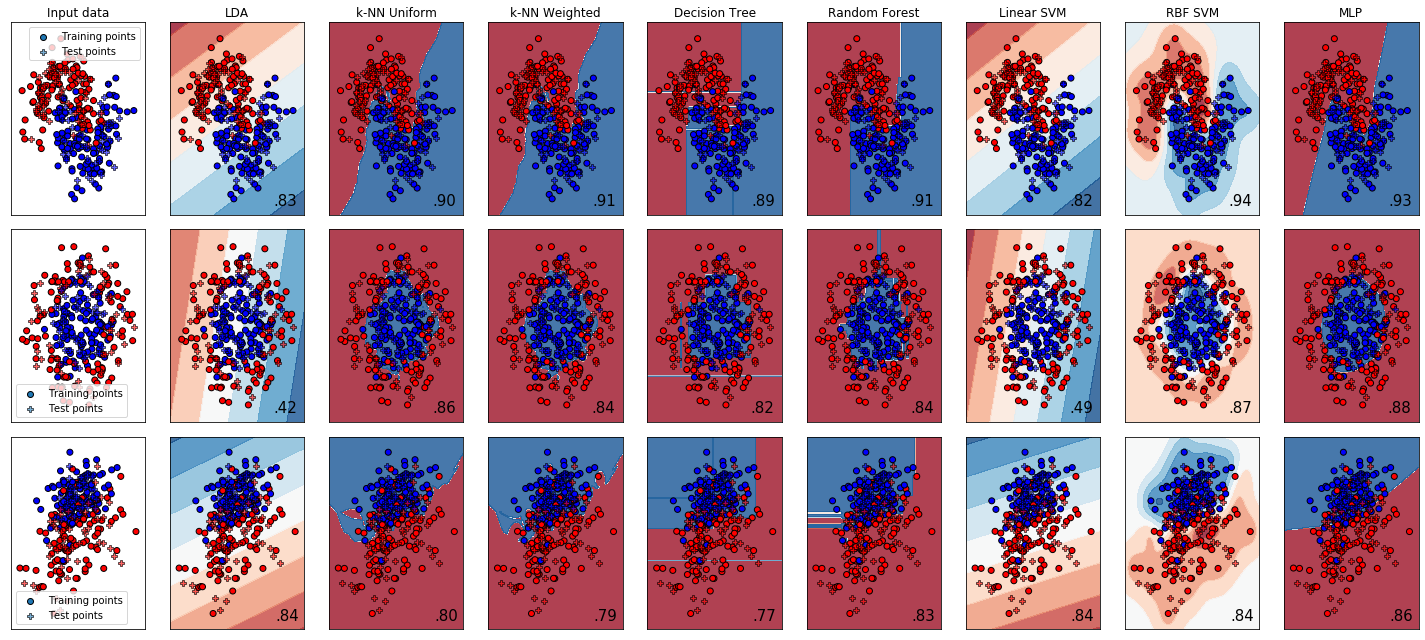

In [12]:
# Source: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

# figure parameters
h = .02  # step size in the mesh
figure = plt.figure(figsize=(20, 9))

# set up classifiers
n_neighbors = 5
classifiers = [LDA(),\
               KNeighborsClassifier(n_neighbors, weights='uniform', metric='euclidean'), \
               KNeighborsClassifier(n_neighbors, weights='distance', metric='euclidean'),\
               DecisionTreeClassifier(max_depth=5),\
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),\
               SVC(kernel="linear", C=0.025),\
               SVC(gamma=2, C=1),\
               MLPClassifier(max_iter=1000)
              ]
names = ["LDA","k-NN Uniform", "k-NN Weighted","Decision Tree", \
         "Random Forest", "Linear SVM", "RBF SVM", "MLP"]

# Put together Data Sets
n_samples = 300
X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2*rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0,n_samples=n_samples),
            make_circles(noise=0.2, factor=0.5, random_state=1,n_samples=n_samples),
            linearly_separable
            ]

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k',label='Training points')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k',label='Test points')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# Implementation of MLPs

In [13]:
# Code from Chapter 4 of Machine Learning: An Algorithmic Perspective (2nd Edition)
# by Stephen Marsland (http://stephenmonika.net)

# You are free to use, change, or redistribute the code in any way you wish for
# non-commercial purposes, but please maintain the name of the original author.
# This code comes with no warranty of any kind.

# Stephen Marsland, 2008, 2014

class mlp:
    """ A Multi-Layer Perceptron"""
    
    def __init__(self,inputs,targets,nhidden,beta=1,momentum=0.9,outtype='linear'):
        """ Constructor """
        # Set up network size
        self.nin = np.shape(inputs)[1]
        self.nout = np.shape(targets)[1] #assumes target is in the form of a one-hot encoder
        self.ndata = np.shape(inputs)[0]
        self.nhidden = nhidden # assumes 1 hidden layer with nhidden neurons

        self.beta = beta
        self.momentum = momentum
        self.outtype = outtype
    
        # Initialise network
        self.weights1 = (np.random.rand(self.nin+1,self.nhidden)-0.5)*2/np.sqrt(self.nin)
        self.weights2 = (np.random.rand(self.nhidden+1,self.nout)-0.5)*2/np.sqrt(self.nhidden)
    
    def mlpfwd(self,inputs):
        """ Run the network forward """

        self.hidden = np.dot(inputs,self.weights1);
        self.hidden = 1.0/(1.0+np.exp(-self.beta*self.hidden)) #assumes a sigmoid activation function
        self.hidden = np.concatenate((self.hidden,-np.ones((np.shape(inputs)[0],1))),axis=1)

        outputs = np.dot(self.hidden,self.weights2);

        # Different types of output neurons
        if self.outtype == 'linear':
            return outputs
        elif self.outtype == 'logistic':
            return 1.0/(1.0+np.exp(-self.beta*outputs))
        elif self.outtype == 'softmax':
            normalisers = np.sum(np.exp(outputs),axis=1)*np.ones((1,np.shape(outputs)[0]))
            return np.transpose(np.transpose(np.exp(outputs))/normalisers)
        else:
            print("error")

    def mlptrain(self,inputs,targets,eta,nepochs):
        """ Train the thing """    
        # Add the inputs that match the bias node
        fig   = plt.figure()
        inputs = np.concatenate((inputs,-np.ones((self.ndata,1))),axis=1)
        change = range(self.ndata)
    
        updatew1 = np.zeros((np.shape(self.weights1)))
        updatew2 = np.zeros((np.shape(self.weights2)))
            
        error = np.zeros(nepochs)
        for n in range(nepochs):
            # BATCH Learning
            self.outputs = self.mlpfwd(inputs)

            error[n] = 0.5*np.sum((self.outputs-targets)**2)
            if (np.mod(n,100)==0):
                print("Epoch: ",n, " Error: ",error[n])  
                #plt.scatter(n,error[n])

            # Different types of output neurons
            if self.outtype == 'linear':
                deltao = (self.outputs-targets)/self.ndata
            elif self.outtype == 'logistic':
                deltao = self.beta*(self.outputs-targets)*self.outputs*(1.0-self.outputs)
            elif self.outtype == 'softmax':
                deltao = (self.outputs-targets)*(self.outputs*(-self.outputs)+self.outputs)/self.ndata 
            else:
                print("error")
            
            deltah = self.hidden*self.beta*(1.0-self.hidden)*(np.dot(deltao,np.transpose(self.weights2)))
                      
            updatew1 = eta*(np.dot(np.transpose(inputs),deltah[:,:-1])) + self.momentum*updatew1
            updatew2 = eta*(np.dot(np.transpose(self.hidden),deltao)) + self.momentum*updatew2
            self.weights1 -= updatew1
            self.weights2 -= updatew2
                
            # Randomise order of inputs (not necessary for matrix-based calculation)
            #np.random.shuffle(change)
            #inputs = inputs[change,:]
            #targets = targets[change,:]
        plt.plot(error,'-o')
        plt.xlabel('Epoch n')
        plt.ylabel('Cost Function J(n)')
        plt.title('Learning Curve')
        plt.legend(["Learning rate = "+ str(eta)])
        plt.plot(np.arange(0,nepochs+1),np.zeros(nepochs+1),'--r')
        plt.show()
        return self.weights1, self.weights2

    def earlystopping(self,inputs,targets,valid,validtargets,eta,nepochs=100):
    
        valid = np.concatenate((valid,-np.ones((np.shape(valid)[0],1))),axis=1)
        
        old_val_error1 = 100002
        old_val_error2 = 100001
        new_val_error = 100000
        
        count = 0
        while (((old_val_error1 - new_val_error) > 0.001) or ((old_val_error2 - old_val_error1)>0.001)):
            count+=1
            print(count)
            self.mlptrain(inputs,targets,eta,nepochs)
            old_val_error2 = old_val_error1
            old_val_error1 = new_val_error
            validout = self.mlpfwd(valid)
            new_val_error = 0.5*np.sum((validtargets-validout)**2)
            
        print("Stopped", new_val_error,old_val_error1, old_val_error2)
        return new_val_error
    
    def confmat(self,inputs,targets):
        """Confusion matrix"""
        
        # ONE-HOT ENDODING labels
        # Add the inputs that match the bias node
        inputs = np.concatenate((inputs,-np.ones((np.shape(inputs)[0],1))),axis=1)
        outputs = self.mlpfwd(inputs)
        
        nclasses = np.shape(targets)[1]

        if nclasses==1:
            nclasses = 2
            outputs = np.where(outputs>0.5,1,0)
        else:
            # 1-of-N encoding
            outputs = np.argmax(outputs,1)
            targets = np.argmax(targets,1)

        cm = np.zeros((nclasses,nclasses))
        for i in range(nclasses):
            for j in range(nclasses):
                cm[i,j] = np.sum(np.where(outputs==i,1,0)*np.where(targets==j,1,0))

        print("Confusion matrix is:")
        print(cm)
        print("Percentage Correct: ",np.trace(cm)/np.sum(cm)*100)


Epoch:  0  Error:  0.3313443826945091
Epoch:  100  Error:  0.05019079108666443


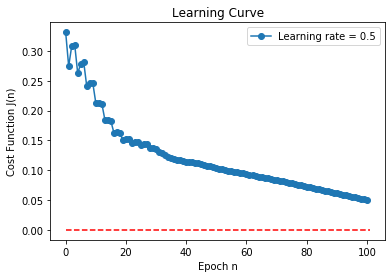

Weights from Input to Hidden Layer
[[0.14108367 1.40129925]
 [0.17419684 1.37870441]
 [1.03663595 2.88917852]]
Weights from Hidden to Output Layer
[[1.28318782]
 [2.38775689]
 [0.6592001 ]]
Confusion matrix is:
[[3. 0.]
 [0. 1.]]
Percentage Correct:  100.0


In [15]:
anddata = np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]])

p = mlp(anddata[:,0:2],anddata[:,2:3],2,momentum=0.9)
w1, w2 = p.mlptrain(anddata[:,0:2],anddata[:,2:3],0.5,101)
print("Weights from Input to Hidden Layer")
print(w1)
print("Weights from Hidden to Output Layer")
print(w2)
p.confmat(anddata[:,0:2],anddata[:,2:3])

Epoch:  0  Error:  1.4283075796258726
Epoch:  100  Error:  0.4985450779545074
Epoch:  200  Error:  0.49610408560227226
Epoch:  300  Error:  0.489002507346834
Epoch:  400  Error:  0.4645196420310445
Epoch:  500  Error:  0.3732743797112748
Epoch:  600  Error:  0.056623542529442975
Epoch:  700  Error:  8.920513162584635e-07
Epoch:  800  Error:  1.101045572581272e-10
Epoch:  900  Error:  4.791973749573702e-15
Epoch:  1000  Error:  1.1779966156774264e-19


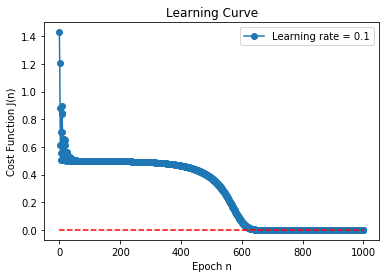

Weights from Input to Hidden Layer
[[ 2.0598164   3.11016214]
 [-2.0298409  -3.0396593 ]
 [-0.85732437  2.29883724]]
Weights from Hidden to Output Layer
[[-2.65844436]
 [ 2.75384381]
 [-1.61529361]]
Confusion matrix is:
[[2. 0.]
 [0. 2.]]
Percentage Correct:  100.0


In [17]:
xordata = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])

p = mlp(xordata[:,0:2],xordata[:,2:3],2,momentum=0.9)
w1, w2 = p.mlptrain(xordata[:,0:2],xordata[:,2:3],0.1,1001)
print("Weights from Input to Hidden Layer")
print(w1)
print("Weights from Hidden to Output Layer")
print(w2)
p.confmat(xordata[:,0:2],xordata[:,2:3])